
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math
%matplotlib inline

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
df = data[['race', 'call']]
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [7]:
blacks = df[df.race == 'b']
whites = df[df.race == 'w']

## 1. What test is appropriate for this problem? Does CLT apply?
We will perform a standard Z-test to determine whether race is a factor in rate of callbacks.

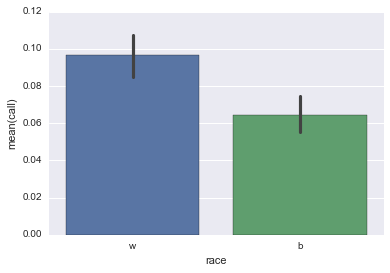

In [9]:
sns.barplot(data=df, x='race', y='call')

In [10]:
b_nobs, b_minmax, b_mean, b_var, b_skew, b_kurt = stats.describe(blacks.call)
w_nobs, w_minmax, w_mean, w_var, w_skew, w_kurt = stats.describe(whites.call)
print "Probability of getting a call-back:\nBlacks: {}%\nWhites: {}%".format(round(b_mean * 100, 2), round(w_mean * 100, 2))

Probability of getting a call-back:
Blacks: 6.45%
Whites: 9.65%


## 2. What are the null and alternate hypotheses?
### H0: Race has no impact on the rate of callbacks
### H1: Race has an impact on the rate of callbacks

## 3.Compute margin of error, confidence interval, and p-value

"Difference of Means" between Blacks and Whites will be our Test Statistic. We will compute use on a 95% Confidence Interval around this mean.

In [31]:
def compute_sample_stat(dist_a, dist_b):
    return abs(dist_a.mean() - dist_b.mean())

def run_simulation(df, test_stat_func):
    size = len(df)/2
    shuff = df.values
    np.random.shuffle(df.values)
    sample_a, sample_b = shuff[: size], shuff[size:]
    return test_stat_func(sample_a, sample_b)
    
def drive_simulation(iters=10000):
    diff_means = []
    for i in xrange(iters):
        diff_means.append(run_simulation(data.call, compute_sample_stat))
    return np.asarray(diff_means)

def compute_pval(real_mean, sample_means):
    return sum(sample_means >= real_mean)/float(len(sample_means))

In [32]:
real_mean_diff = compute_sample_stat(blacks.call, whites.call)
print 'Actual difference between means: {}'.format(real_mean_diff)

Actual difference between means: 0.0320328548551


Now, let's simulate many tries/samples by assuming the null hypothesis - that race has no impact. We will randomly split the population and compute the test statistic for these spits.

In [30]:
sample_means = drive_simulation()
p_val = compute_pval(real_mean_diff, sample_means)
std = sample_means.std()
m_nobs, m_minmax, m_mean, m_var, m_skew, m_kurt = stats.describe(sample_means)
m_std = math.sqrt(m_var)
conf_int = stats.norm.interval(0.95, loc=m_mean, scale=m_std)
print 'Real Mean Difference: {}'.format(real_mean_diff)
print 'Confidence Interval: {}'.format(conf_int)
print 'Standard Error: {}'.format(m_std)
print 'P-Value: {}'.format(p_val)

Real Mean Difference: 0.0320328548551
Confidence Interval: (-0.003003678563138247, 0.015450938883324862)
Standard Error: 0.00470789708179
P-Value: 2e-05


### Conclusion: Reject H0. H1 is validated: Race definitely has an impact on the rate of callbacks

## 4. Discuss statistical significance.
#### The difference in callbacks rate between blacks and whites in our sample is 0.032; In other words, being white gives a improves a person's chance of getting a callback by 3.2%
#### A P-value of nearly 0 tells us that there is near ZERO probability that we could have gotten this effect at random. Clearly, there is a race-induced bias in the callbacks. Also, the Standard Error is extremely low, which tells us that our results are statistically significant.
